In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv') #Read the csv value
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [4]:
df.info() #check the overall information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

In [5]:
df.isnull().sum() #check the null value

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         5
Base MSRP                                              5
Legislative District                                 445
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [7]:
df.duplicated().sum() #check the duplicate value

0

In [9]:
df.describe() #check overall statistics of the data

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210161.000000,210165.000000,210160.000000,210160.000000,209720.000000,2.101650e+05,2.101610e+05
mean,98178.209406,2021.048657,50.602241,897.676889,28.929954,2.290774e+08,5.297929e+10
std,2445.429402,2.988941,86.973210,7653.588604,14.908392,7.115519e+07,1.551466e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948816e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405164e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.629758e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [10]:
df.corr()#check the correlation between columns

C:\Users\PRAVAT\AppData\Local\Temp\ipykernel_15228\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,-0.001291,-0.000800,-0.003408,-0.412348,0.005862,0.508744
Model Year,-0.001291,1.000000,-0.513534,-0.230651,-0.016824,0.215703,0.004710
Electric Range,-0.000800,-0.513534,1.000000,0.114155,0.019025,-0.140689,-0.000323
Base MSRP,-0.003408,-0.230651,0.114155,1.000000,0.010477,-0.039501,-0.000283
Legislative District,-0.412348,-0.016824,0.019025,0.010477,1.000000,-0.010728,-0.100714
DOL Vehicle ID,0.005862,0.215703,-0.140689,-0.039501,-0.010728,1.000000,0.003347
2020 Census Tract,0.508744,0.004710,-0.000323,-0.000283,-0.100714,0.003347,1.000000


In [22]:
df['Model'].values

array(['X5', 'MODEL 3', 'PANAMERA', ..., 'RAV4 PRIME', 'MODEL 3',
       'MODEL Y'], dtype=object)

In [25]:
df['Electric Range'].values

array([ 30., 215.,  15., ...,  42.,   0.,   0.])

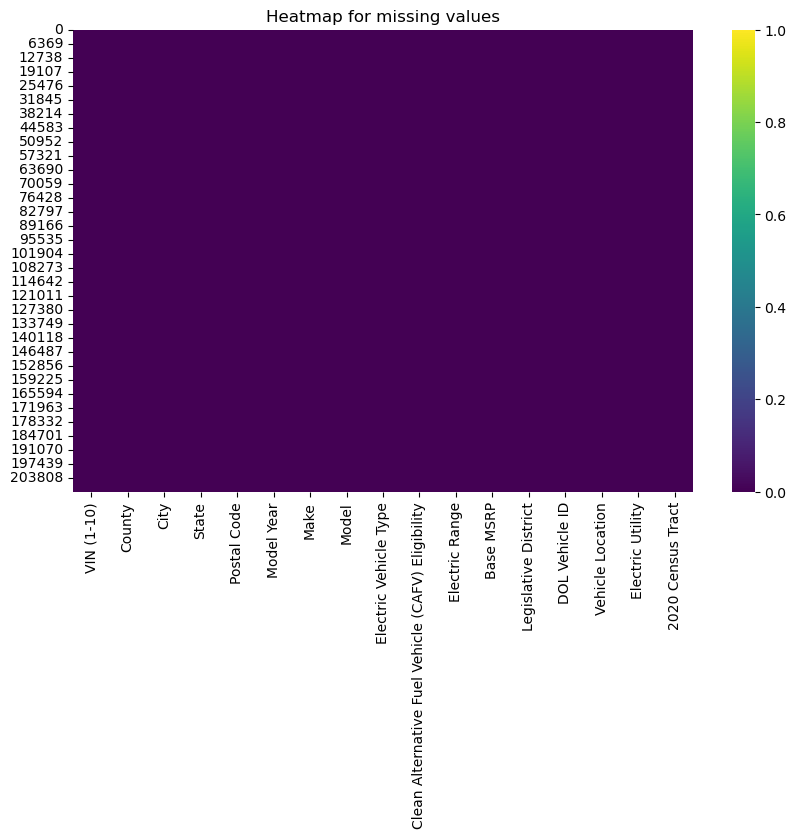

In [12]:
#visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar='False' , cmap='viridis')
plt.title("Heatmap for missing values")
plt.show()

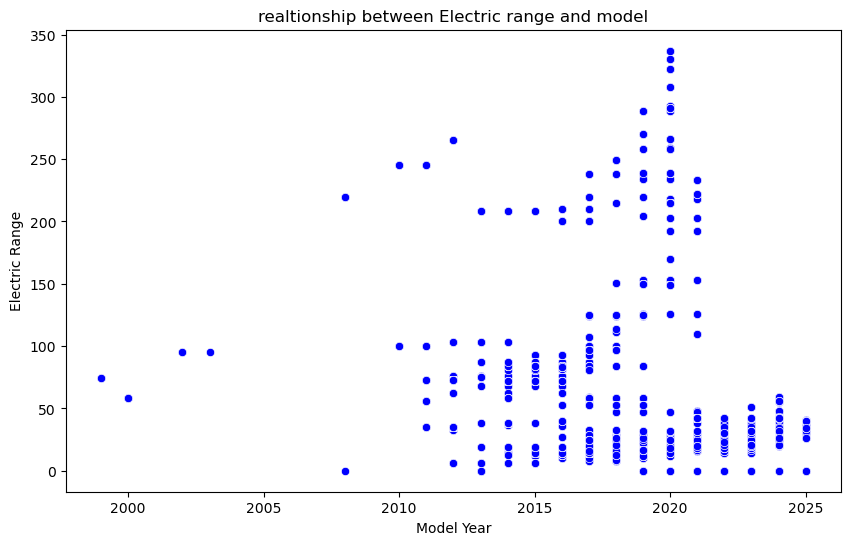

In [17]:
#Relationship between Electric Range and model
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x= 'Model Year' , y='Electric Range' , color='blue')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('realtionship between Electric range and model')
plt.show()

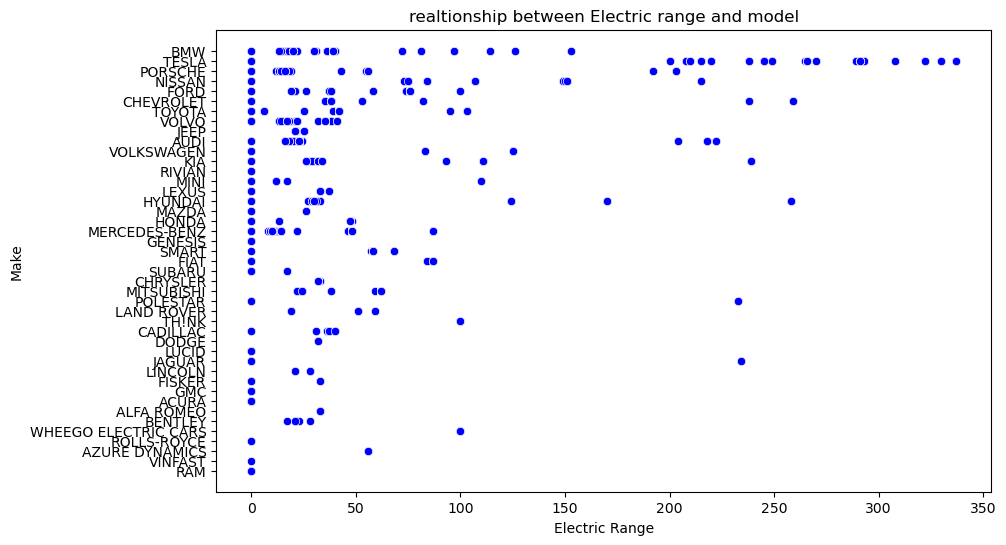

In [19]:
#Relationship between Electric Range and model
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x= 'Electric Range' , y='Make' , color='blue')
plt.xlabel('Electric Range')
plt.ylabel('Make')
plt.title('realtionship between Electric range and model')
plt.show()

C:\Users\PRAVAT\AppData\Local\Temp\ipykernel_15228\3814282754.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True , cmap = 'coolwarm' , fmt = '.2f')


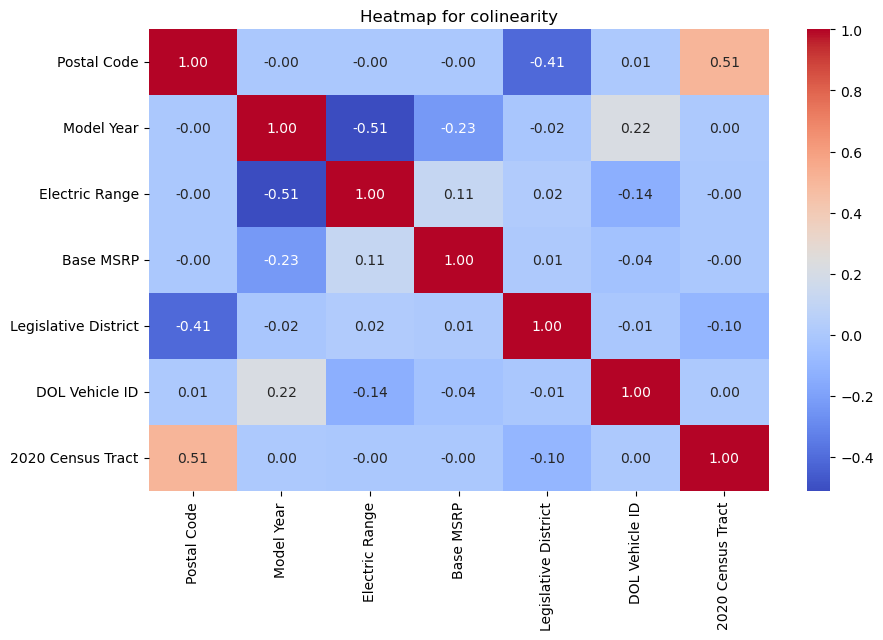

In [26]:
#heatmap for detect multicolinearity
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True , cmap = 'coolwarm' , fmt = '.2f')
plt.title('Heatmap for colinearity')
plt.show()

In [31]:
df.nlargest(10,'Electric Range')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1095,5YJSA1E41L,King,Bellevue,WA,98005.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,48.0,261155807,POINT (-122.167394 47.614119),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2899,5YJSA1E45L,King,Bellevue,WA,98008.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,48.0,104710539,POINT (-122.1197677 47.6103472),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
3249,5YJSA1E41L,King,Auburn,WA,98001.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,47.0,143887173,POINT (-122.2651204 47.3164638),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
9155,5YJSA1E46L,Thurston,Olympia,WA,98512.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,35.0,109807414,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
11880,5YJSA1E42L,Snohomish,Mill Creek,WA,98012.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,44.0,104642107,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
14310,5YJSA1E45L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,23.0,102573621,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
18127,5YJSA1E44L,Clark,Vancouver,WA,98684.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,17.0,131590462,POINT (-122.5241377 45.6278995),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
19364,5YJSA1E43L,Jefferson,Quilcene,WA,98376.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,24.0,132258976,POINT (-122.8484397 47.8157721),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10
25277,5YJSA1E48L,Clark,Vancouver,WA,98683.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,17.0,231099067,POINT (-122.515805 45.604689),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
30212,5YJSA1E43L,Spokane,Spokane Valley,WA,99016.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337.0,0.0,4.0,112305420,POINT (-117.1598888 47.6568937),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
